In [19]:
#This code has been adapted from the tensorflow documentation 
import keras 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D
import numpy as np
import os

In [20]:
tf.__version__

'2.5.0-dev20210104'

In [21]:
img_height = 180
img_width = 180
batch_size = 32

In [22]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  "LogosNew/Train",
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1122 files belonging to 29 classes.
Using 898 files for training.


In [23]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  "LogosNew/Train",
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1122 files belonging to 29 classes.
Using 224 files for validation.


In [24]:
class_names = train_ds.class_names
print(class_names)

['Adidas', 'Apple', 'BMW', 'Citroen', 'Cocacola', 'DHL', 'Fedex', 'Ferrari', 'Ford', 'Google', 'HP', 'Heineken', 'Intel', 'McDonalds', 'Mini', 'Multiple', 'Nbc', 'Nike', 'None', 'Pepsi', 'Porsche', 'Puma', 'Redbull', 'Sprite', 'Starbucks', 'Texaco', 'Unicef', 'Vodafone', 'Yahoo']


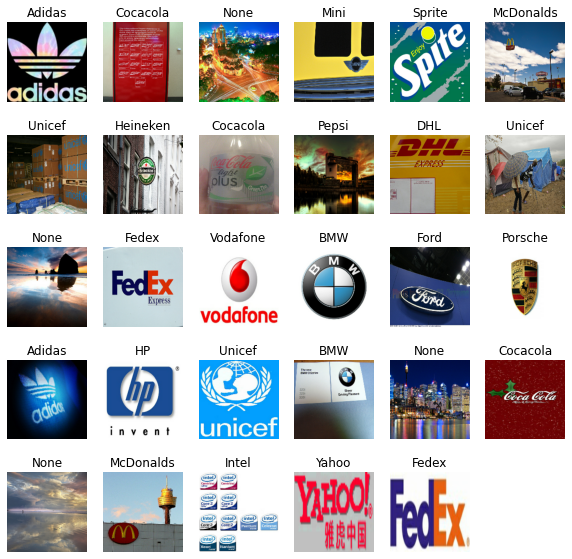

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(29):
    ax = plt.subplot(5, 6, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [43]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 180, 180, 3)
(32,)


In [27]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [28]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [29]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [30]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

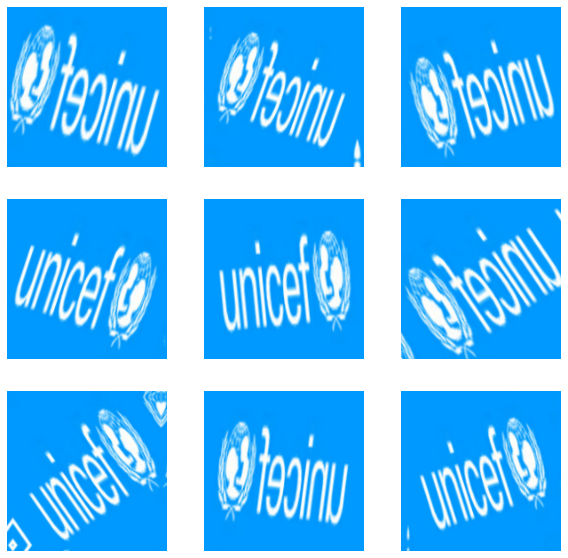

In [31]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [32]:
num_classes = 29
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [33]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [34]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_2 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_3 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 45, 45, 64)       

In [35]:
epochs = 49
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/49
29/29 [==============================] - 25s 812ms/step - loss: 3.5316 - accuracy: 0.0441 - val_loss: 3.2412 - val_accuracy: 0.1384
Epoch 2/49
29/29 [==============================] - 23s 833ms/step - loss: 3.1955 - accuracy: 0.1527 - val_loss: 3.1199 - val_accuracy: 0.1607
Epoch 3/49
29/29 [==============================] - 24s 817ms/step - loss: 3.0993 - accuracy: 0.1725 - val_loss: 3.0311 - val_accuracy: 0.1741
Epoch 4/49
29/29 [==============================] - 24s 840ms/step - loss: 2.8811 - accuracy: 0.2053 - val_loss: 2.8850 - val_accuracy: 0.2411
Epoch 5/49
29/29 [==============================] - 30s 1s/step - loss: 2.7346 - accuracy: 0.2583 - val_loss: 2.7671 - val_accuracy: 0.3125
Epoch 6/49
29/29 [==============================] - 26s 899ms/step - loss: 2.5727 - accuracy: 0.2928 - val_loss: 2.9121 - val_accuracy: 0.2857
Epoch 7/49
29/29 [==============================] - 23s 794ms/step - loss: 2.3328 - accuracy: 0.3817 - val_loss: 2.5989 - val_accuracy: 0.3839
Ep

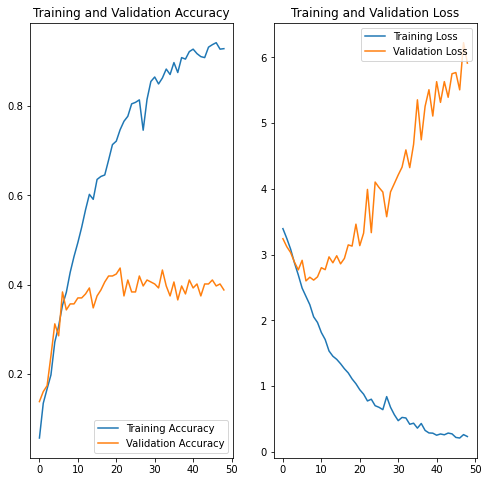

In [39]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [40]:
image_path = "/Users/RishiSingh/Computer Science University /Third Year - 2020-2021/Artificial Intelligence/CNN Dataset/flickr_logos_27_dataset 2/LogosNew/Predictions/yahoo.jpg"

img = keras.preprocessing.image.load_img(
    image_path, target_size=(180, 180)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to None with a 91.56 percent confidence.


In [41]:
os.getcwd()

'/Users/RishiSingh/Computer Science University /Third Year - 2020-2021/Artificial Intelligence/CNN Dataset/flickr_logos_27_dataset 2'

In [42]:
model.save(os.path.join(os.getcwd(),"BrandsLogoCNNFinal.h5"))